# PointSampler

In [1]:
from wholeslidedata.samplers.pointsampler import RandomPointSampler, CenterPointSampler, CentroidPointSampler, TopLeftPointSampler
from wholeslidedata import WholeSlideAnnotation
from wholeslidedata.visualization.plotting import plot_annotations
from matplotlib import pyplot as plt
from sourcelib.collect import get_files_from_folder
from sourcelib.associations import associate_files
from wholeslidedata.data.files import WholeSlideImageFile, WholeSlideAnnotationFile
from wholeslidedata.data.mode import WholeSlideMode
from wholeslidedata.interoperability.asap.backend import AsapWholeSlideImageBackend
from wholeslidedata.interoperability.asap.parser import AsapAnnotationParser
from wholeslidedata.data.dataset import WholeSlideDataSet
import numpy as np

In [34]:
image_files = get_files_from_folder(file_cls=WholeSlideImageFile, folder='/tmp/', mode=WholeSlideMode.default, excludes=['mask'], image_backend=AsapWholeSlideImageBackend)
annotation_files =get_files_from_folder(file_cls=WholeSlideAnnotationFile, folder='/tmp/', mode=WholeSlideMode.default, filters=['xml'], annotation_parser=AsapAnnotationParser)
associations = associate_files(image_files, annotation_files)
dataset = WholeSlideDataSet(mode=WholeSlideMode.training, associations=associations)
reference = list(dataset.sample_references.values())[0][0]
annotation = dataset.get_annotation_from_reference(reference)

## Center/Centroid/TopLeft PointSampler

In [35]:
point_sampler = CenterPointSampler(seed=123)
center_points = np.array([[a[0] for a in point_sampler.sample(annotation).xy] for i in range(100)])

point_sampler = CentroidPointSampler(seed=123)
centroid_points = np.array([[a[0] for a in point_sampler.sample(annotation).xy] for i in range(100)])

point_sampler = TopLeftPointSampler(seed=123)
top_left_points = np.array([[a[0] for a in point_sampler.sample(annotation).xy] for i in range(100)])

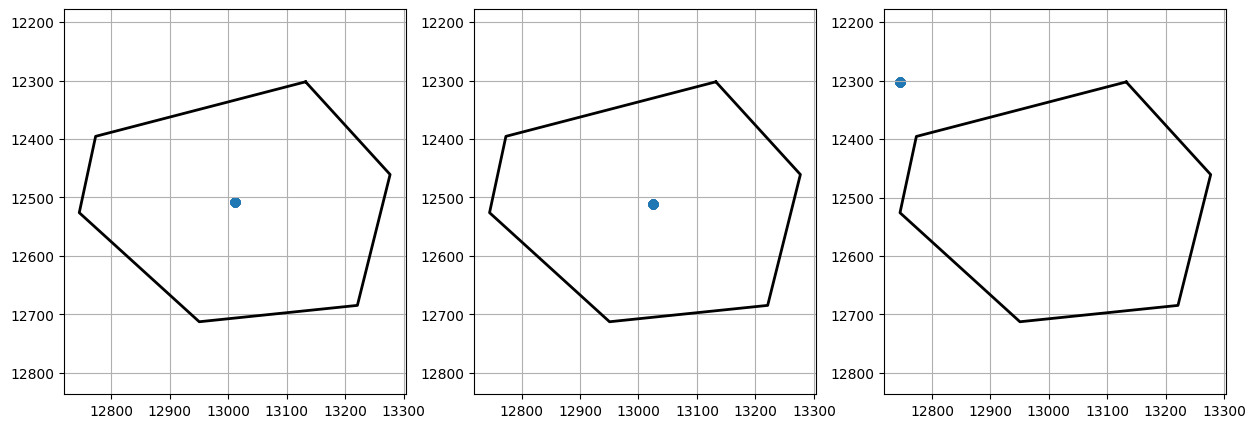

In [39]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

plot_annotations([annotation], ax=ax[0])
ax[0].scatter(center_points[...,0], center_points[...,1])
ax[0].grid()
plot_annotations([annotation], ax=ax[1])
ax[1].scatter(centroid_points[...,0], centroid_points[...,1])
ax[1].grid()
plot_annotations([annotation], ax=ax[2])
ax[2].scatter(top_left_points[...,0], top_left_points[...,1])
ax[2].grid()
plt.show()

## RandomPointSampler

In [40]:
point_sampler = RandomPointSampler(seed=123)
points = np.array([[a[0] for a in point_sampler.sample(annotation).xy] for i in range(100)])

point_sampler = RandomPointSampler(seed=123, buffer=-32)
points_buffered = np.array([[a[0] for a in point_sampler.sample(annotation).xy] for i in range(100)])

point_sampler = RandomPointSampler(seed=123, buffer={'spacing': 2.0, 'value':-32})
points_buffered_spacing = np.array([[a[0] for a in point_sampler.sample(annotation).xy] for i in range(100)])

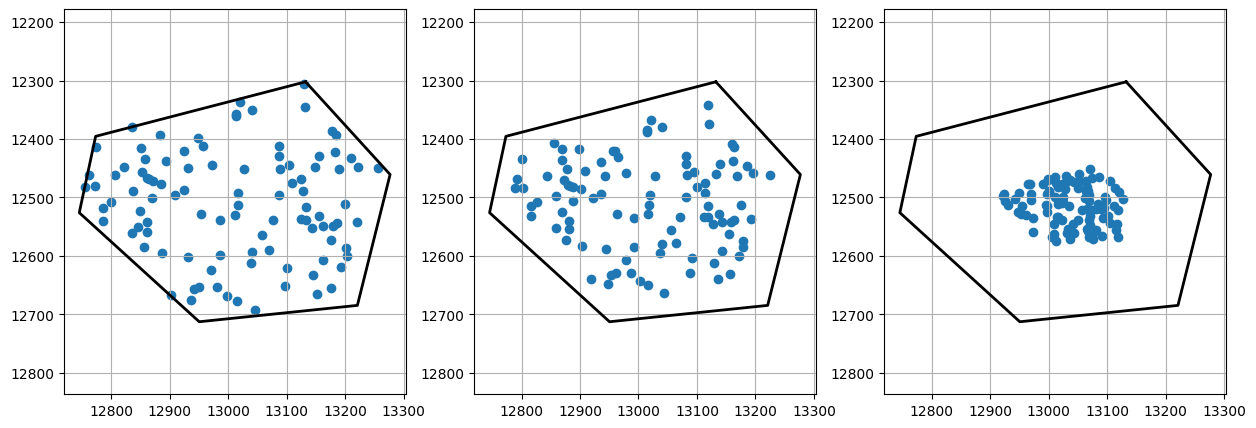

In [41]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

plot_annotations([annotation], ax=ax[0])
ax[0].scatter(points[...,0], points[...,1])
ax[0].grid()
plot_annotations([annotation], ax=ax[1])
ax[1].scatter(points_buffered[...,0], points_buffered[...,1])
ax[1].grid()
plot_annotations([annotation], ax=ax[2])
ax[2].scatter(points_buffered_spacing[...,0], points_buffered_spacing[...,1])
ax[2].grid()
plt.show()